In [1]:
#Importing the libraries and accomodating the data into a pandas dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### The equations we will be using is: 
### 1.

### \begin{align} 
h_{\theta}(X) & = \theta_{0} + \theta_{1}.x_{1} + \theta_{2}.x_{2} + \theta_{3}.x_{3} + \theta_{4}.x_{4} + \theta_{5}.x_{5} + \theta_{6}.x_{6} + \theta_{7}.x_{7} + \theta_{8}.x_{8} + \theta_{9}.x_{9} + \theta_{10}.x_{10} + \theta_{11}.x_{11}
\end{align}

#### where y hat is the predicted value, $θ_{0}$ is the intercept, $θ_{1}$, $θ_{2}$, $θ_{3}$, $θ_{4}$, $θ_{5}$, $θ_{6}$, $θ_{7}$, $θ_{8}$, $θ_{9}$, $θ_{10}$ and $θ_{11}$ are the coefficients and $X_{1}$, $X_{2}$, $X_{3}$, $X_{4}$, $X_{5}$, $X_{6}$, $X_{7}$, $X_{8}$, $X_{9}$, $X_{10}$ and $X_{11}$ are the independent variables. $X_{0}$ will be a column of 1s in the matrix X. 

### 2.
### \begin{align} 
\theta_{j} = \theta_{j} - \alpha\frac{1}{m}\sum \limits _{i=1} ^{m}(h_{\theta}(x^{i}) - y^{i}).(x_{j}^{i})
\end{align}

#### where x are the features(Independent variables), y is the target value(dependent variable) and m is the length of training sample


In [2]:
#Checking the shape
df.shape

(1599, 12)

In [3]:
#Changing the dataframe to an array for train/test split
df_to_array = df.values

In [4]:
#Checking how our array looks
df_to_array

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [5]:
#Shuffling data to make it random before splitting then splitting into 80% training and 20% testing
np.random.shuffle(df_to_array)
train, test = df_to_array[:1200,:], df_to_array[1200:,:]

In [6]:
#Checking our training sample
train

array([[ 7.9 ,  0.66,  0.  , ...,  0.58,  9.5 ,  5.  ],
       [12.9 ,  0.5 ,  0.55, ...,  0.68, 10.9 ,  6.  ],
       [ 7.7 ,  0.51,  0.28, ...,  0.74,  9.2 ,  5.  ],
       ...,
       [ 7.6 ,  0.54,  0.13, ...,  0.61,  9.4 ,  5.  ],
       [ 7.3 ,  0.51,  0.18, ...,  0.73,  9.5 ,  6.  ],
       [ 4.6 ,  0.52,  0.15, ...,  0.56, 13.1 ,  4.  ]])

In [7]:
#Checking our testing sample
test

array([[ 8.8       ,  0.24      ,  0.54      , ...,  0.54      ,
         9.2       ,  5.        ],
       [10.3       ,  0.34      ,  0.52      , ...,  0.64      ,
         9.4       ,  5.        ],
       [ 7.4       ,  0.5       ,  0.47      , ...,  0.57      ,
         9.1       ,  5.        ],
       ...,
       [13.2       ,  0.38      ,  0.55      , ...,  0.54      ,
         9.4       ,  5.        ],
       [ 6.9       ,  0.84      ,  0.21      , ...,  0.72      ,
         9.23333333,  6.        ],
       [ 8.2       ,  0.635     ,  0.1       , ...,  0.75      ,
        10.9       ,  6.        ]])

In [8]:
#Diving split data into X and y for machine learning where X will be for independent variables and y for dependent
X_train = train[:,:-1]
X_test = test[:,:-1]
y_train = train[:,-1]
y_test = test[:,-1]

In [9]:
#Running gradient descent
coef1=0
coef2=0
coef3=0
coef4=0
coef5=0
coef6=0
coef7=0
coef8=0
coef9=0
coef10=0
coef11=0
intercept=0
epochs=1000
learning_rate=0.0001
n = len(y_train)
cost_hist = []

for i in range(epochs):
    #Cost Function
    y_current = ((coef1 * X_train[:,0]) + (coef2 * X_train[:,1]) + 
                 (coef3 * X_train[:,2]) + (coef4 * X_train[:,3]) + 
                 (coef5 * X_train[:,4]) + (coef6 * X_train[:,5]) + 
                 (coef7 * X_train[:,6]) + (coef8 * X_train[:,7]) + 
                 (coef9 * X_train[:,8]) + (coef10 * X_train[:,9]) + 
                 (coef11 * X_train[:,10]) + intercept)
    #To minimize
    cost = sum([data**2 for data in (y_train-y_current)])/n
    cost_hist.append(cost)
    
    #Derivate Calculation
    intercept_derivative = -(2/n) * sum(y_train - y_current)
    coef1_derivative = -(2/n) * sum(X_train[:,0] * (y_train - y_current))
    coef2_derivative = -(2/n) * sum(X_train[:,1] * (y_train - y_current))
    coef3_derivative = -(2/n) * sum(X_train[:,2] * (y_train - y_current))
    coef4_derivative = -(2/n) * sum(X_train[:,3] * (y_train - y_current))
    coef5_derivative = -(2/n) * sum(X_train[:,4] * (y_train - y_current))
    coef6_derivative = -(2/n) * sum(X_train[:,5] * (y_train - y_current))
    coef7_derivative = -(2/n) * sum(X_train[:,6] * (y_train - y_current))
    coef8_derivative = -(2/n) * sum(X_train[:,7] * (y_train - y_current))
    coef9_derivative = -(2/n) * sum(X_train[:,8] * (y_train - y_current))
    coef10_derivative = -(2/n) * sum(X_train[:,9] * (y_train - y_current))
    coef11_derivative = -(2/n) * sum(X_train[:,10] * (y_train - y_current))
    
    #Fitting derivative into main equation to update coefficients
    intercept = intercept - (learning_rate * intercept_derivative)
    coef1 = coef1 - (learning_rate * coef1_derivative)
    coef2 = coef2 - (learning_rate * coef2_derivative)
    coef3 = coef3 - (learning_rate * coef3_derivative)
    coef4 = coef4 - (learning_rate * coef4_derivative)
    coef5 = coef5 - (learning_rate * coef5_derivative)
    coef6 = coef6 - (learning_rate * coef6_derivative)
    coef7 = coef7 - (learning_rate * coef7_derivative)
    coef8 = coef8 - (learning_rate * coef8_derivative)
    coef9 = coef9 - (learning_rate * coef9_derivative)
    coef10 = coef10 - (learning_rate * coef10_derivative)
    coef11 = coef11 - (learning_rate * coef11_derivative)
    
print('Cost:          ',cost,'\nIntercept:     ',intercept,'\nCoefficient 1: ',coef1,'\nCoefficient 2: ',coef2,'\nCoefficient 3: ',coef3,
      '\nCoefficient 4: ',coef4,'\nCoefficient 5: ',coef5,'\nCoefficient 6: ',coef6,'\nCoefficient 7:',coef7,
      '\nCoefficient 8: ',coef8,'\nCoefficient 9: ',coef9,'\nCoefficient 10:',coef10,'\nCoefficient 11:',coef11)

Cost:           0.5255890695579148 
Intercept:      0.03031901565804306 
Coefficient 1:  0.1891937283474344 
Coefficient 2:  0.010026308551905082 
Coefficient 3:  0.005872425557930345 
Coefficient 4:  0.0370278668051755 
Coefficient 5:  0.0019365229359430477 
Coefficient 6:  0.01094310895828418 
Coefficient 7: -0.003361344755391783 
Coefficient 8:  0.03013849948697474 
Coefficient 9:  0.10301818060954375 
Coefficient 10: 0.023088136006980654 
Coefficient 11: 0.33655895823125587


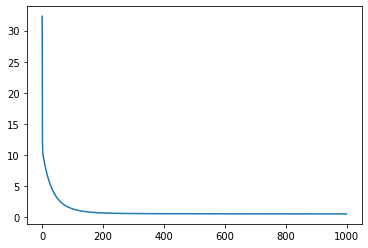

In [10]:
#Plotting the cost function
plt.plot(cost_hist);

In [11]:
#Calculating the predicted values
predicted_values = []
for i in range(0,399):
    y_pred = ((coef1 * X_test[i,0]) + (coef2 * X_test[i,1]) + 
              (coef3 * X_test[i,2]) + (coef4 * X_test[i,3]) + 
              (coef5 * X_test[i,4]) + (coef6 * X_test[i,5]) + 
              (coef7 * X_test[i,6]) + (coef8 * X_test[i,7]) + 
              (coef9 * X_test[i,8]) + (coef10 * X_test[i,9]) + 
              (coef11 * X_test[i,10]) + intercept)
    predicted_values.append(y_pred)

### \begin{align}
J(\theta) = \frac{1}{n} \sum \limits _{i=1} ^{n} (\hat{y}_i - y_i)^{2}
\end{align}


#### Where n is the sample size, y hat is the predicted value and y is the test value. J(θ) is actually the cost function and is also called mean squared error. Minimizing the cost function to predict accurately is the principle behind Linear Regression.

In [12]:
#Now to calculate the mean squared error
Mean_Squared_Error = (sum((predicted_values-y_test)**2)/399)
print(Mean_Squared_Error)

0.5396043418146855
